In [42]:
#!/usr/bin/python
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [43]:
#PROBLEMA DE TRES CUERPOS

#Creamos la clase Planetas, que define las propiedades de un cuerpo celeste.
class Planetas: 
    #Constante gravitacional
    G = 1.0
    def __init__(self, m, x, y, z, vx, vy, vz):
        self.m = m
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.ax=0
        self.ay=0
        self.az=0
        
    #Calcula la aceleracion a causa de las fuerzas de los demas planetas con los que interactua en un punto determinado    
    def aceleracion(self, planetas):
        self.ax=0
        self.ay=0
        self.az=0
        for i in range(0,len(planetas)):
            if(planetas[i]!=self):
                xp = planetas[i].x-self.x
                yp = planetas[i].y-self.y
                zp= planetas[i].z-self.z
                rx = xp/np.sqrt(xp**2.0+yp**2.0+zp**2.0)
                ry = yp/np.sqrt(xp**2.0+yp**2.0+zp**2.0)
                rz = zp/np.sqrt(xp**2.0+yp**2.0+zp**2.0)
                rr = (xp**2.0+yp**2.0+zp**2.0)
                self.ax += self.G*planetas[i].m*rx/rr
                self.ay += self.G*planetas[i].m*ry/rr
                self.az += self.G*planetas[i].m*rz/rr
    
    #Se resuelven las ecuaciones diferenciales mediante el metodo Leap-Frog (Simplectico)
    def leapFrog(self, h, planetas):
        self.aceleracion(planetas)
        vx_mitad = self.vx + 0.5*h*self.ax
        vy_mitad = self.vy + 0.5*h*self.ay
        vz_mitad = self.vz + 0.5*h*self.az
        
        self.x = self.x + h*vx_mitad
        self.y = self.y + h*vy_mitad
        self.z = self.z + h*vz_mitad
        
        self.aceleracion(planetas)
        self.vx = vx_mitad + 0.5*h*self.ax
        self.vy = vy_mitad + 0.5*h*self.ay  
        self.vz = vz_mitad + 0.5*h*self.az 

In [44]:
#Se define una funcion que itera sobre los tres cuerpos, hallando las velocidades y las posiciones.
def iteradorTresCuerpos(h, planetas, it):
    x_troyano = np.zeros(it+1)
    x_troyano[0] = planetas[0].x
    y_troyano = np.zeros(it+1)
    y_troyano[0] = planetas[0].y
    z_troyano = np.zeros(it+1)
    z_troyano[0] = planetas[0].z
    x_planeta = np.zeros(it+1)
    x_planeta[0] = planetas[1].x
    y_planeta = np.zeros(it+1)
    y_planeta[0] = planetas[1].y
    z_planeta = np.zeros(it+1)
    z_planeta[0] = planetas[1].z
    x_estrella = np.zeros(it+1)
    x_estrella[0] = planetas[2].x
    y_estrella = np.zeros(it+1)
    y_estrella[0] = planetas[2].y
    z_estrella = np.zeros(it+1)
    z_estrella[0] = planetas[2].z

    for i in range(1, it+1):
        planetas[0].leapFrog(h, planetas)
        planetas[1].leapFrog(h, planetas)
        planetas[2].leapFrog(h, planetas)
    
        x_troyano[i] = planetas[0].x
        y_troyano[i] = planetas[0].y
        z_troyano[i] = planetas[0].z
        x_planeta[i] = planetas[1].x
        y_planeta[i] = planetas[1].y
        z_planeta[i] = planetas[1].z
        x_estrella[i] = planetas[2].x
        y_estrella[i] = planetas[2].y
        z_estrella[i] = planetas[2].z
    
    return x_troyano, y_troyano, z_troyano, x_planeta, y_planeta, z_planeta, x_estrella, y_estrella, z_estrella

In [45]:
#Se define una funcion que actualiza las condiciones iniciales cada vez que se requiera.
def actualizarCondicionesIniciales(m):
    x_planet = 100.0-100.0/1048
    x_star = -100.0/1048
    x_trojan = np.cos(60*np.pi/180)*x_planet
    y_trojan = np.sin(60*np.pi/180)*x_planet
    m_star = 1047.0
    m_trojan = 0.005
    m_planet = m
    m_red = np.sqrt(abs((m_planet+m_star)/(x_planet+x_star)**3.0))
    vy_planet = m_red*abs(x_planet)
    vy_star = -m_red*abs(x_star)
    vx_trojan = -vy_planet*np.sin(60*np.pi/180)
    vy_trojan = vy_planet*np.cos(60*np.pi/180)
    
    return m_trojan, x_trojan, y_trojan, vx_trojan, vy_trojan, m_planet,x_planet,vy_planet, m_star,x_star,vy_star

#Se crean los cuerpos celestes con las condiciones iniciales apropiadas
m_trojan, x_trojan, y_trojan, vx_trojan, vy_trojan, m_planet,x_planet,vy_planet, m_star,x_star,vy_star = actualizarCondicionesIniciales(1.0)
troyano = Planetas(m_trojan, x_trojan, y_trojan, 0, vx_trojan, vy_trojan, 0)
planeta = Planetas(m_planet,x_planet,0,0, 0, vy_planet, 0)
estrella = Planetas(m_star,x_star,0,0, 0,vy_star, 0)
planets = [troyano, planeta, estrella]

#Se itera sobre los cuerpos celestes creados previamente para obtener sus posiciones.
h=0.01
it=40000
x_troyano, y_troyano, z_troyano, x_planeta, y_planeta, z_planeta, x_estrella, y_estrella, z_estrella = iteradorTresCuerpos(h, planets, it)

In [46]:
#Se grafican las orbitas de los tres cuerpos
#fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6,8))
#ax1.plot(x_troyano, y_troyano, label=r"$Troyano$", c="g")
#ax1.scatter(x_estrella, y_estrella)
#ax1.set_title(r"$\'Orbitas$ $de$ $los$ $tres$ $cuerpos$", fontsize=20)
#ax1.legend()
#ax1.set_xlim([-150, 150])
#ax1.set_ylim([-150, 150])
#ax2.plot(x_planeta, y_planeta, label=r"$Planeta$", c="b")
#ax2.set_ylabel(r"$y$", fontsize=20)
#ax2.legend()
#ax2.set_xlim([-150, 150])
#ax3.plot(x_estrella, y_estrella, label=r"$Estrella$", c="r")
#ax3.set_xlabel(r"$x$", fontsize=20)
#ax3.set_xlim([-0.15, 0.15])
#ax3.set_ylim([-0.15, 0.15])
#ax3.legend()"'
#fig.subplots_adjust(hspace=0.3)
#plt.savefig("OrbitsPLOT.pdf")
#plt.close()
#plt.show()
#'''

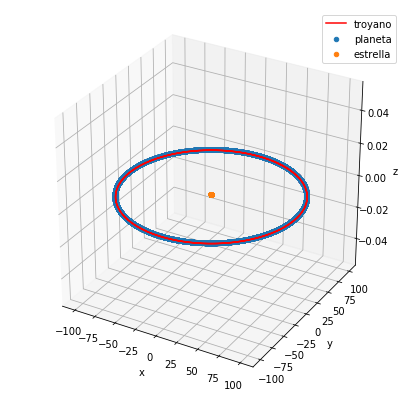

In [47]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_troyano,y_troyano, z_troyano, label="troyano", c="r")
ax.scatter(x_planeta,y_planeta, z_planeta, label="planeta")
ax.scatter(x_estrella,y_estrella, z_estrella, label="estrella")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()

plt.show()

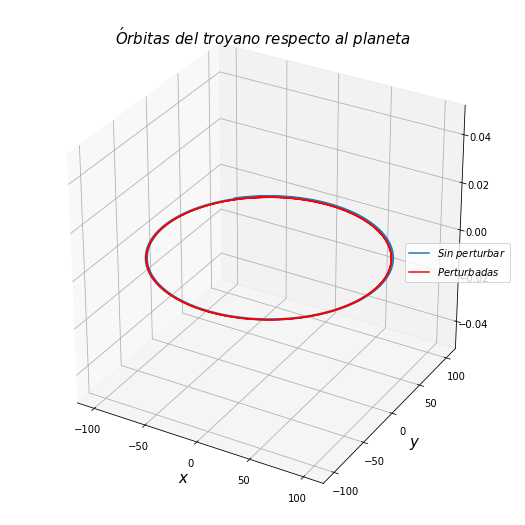

In [48]:
#Se crea una nueva lista de planetas con las condiciones iniciales perturbadas
m_trojan, x_trojan, y_trojan, vx_trojan, vy_trojan, m_planet,x_planet,vy_planet, m_star,x_star,vy_star = actualizarCondicionesIniciales(1.0)
troyanop = Planetas(m_trojan, x_trojan+50, y_trojan+50, 0, vx_trojan+50, vy_trojan+50, 0)
planetap = Planetas(m_planet,x_planet+50,50, 0, 50,vy_planet+50, 0)
estrellap = Planetas(m_star,x_star+50,50, 0, 50,vy_star+50, 0) 
pp = [troyanop, planetap, estrellap]
x_troyanop, y_troyanop, z_troyanop, x_planetap, y_planetap, z_planetap, x_estrellap, y_estrellap, z_estrellap = iteradorTresCuerpos(h, pp, it)



fig = plt.figure(figsize=(7,7))
ax1 = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
#Se grafica la orbita del troyano en el sistema de referencia del planeta, con las condiciones iniciales que se piden y con una peque√±a perturbacion
ax1.plot(x_troyano-x_planeta, y_troyano-y_planeta, z_troyano-z_planeta, label=r"$Sin$ $perturbar$")
ax1.plot(x_troyanop-x_planetap, y_troyanop-y_planetap, z_troyanop-z_planetap, label=r"$Perturbadas$", c="r")
ax1.set_title(r"$\'Orbitas$ $del$ $troyano$ $respecto$ $al$ $planeta$",fontsize=15)
ax1.set_ylabel(r"$y$", fontsize=15)
ax1.set_xlabel(r"$x$", fontsize=15)
ax1.legend(loc=7)
#plt.savefig("Troyano.pdf")
#plt.close()
plt.show()

In [49]:

#Se crean los nuevos objetos con las condiciones iniciales pertinentes, cambiando la masa del planeta. Se hace para m2 igual a 10, 20, 30 y 40.
m_trojan, x_trojan, y_trojan, vx_trojan, vy_trojan, m_planet,x_planet,vy_planet, m_star,x_star,vy_star = actualizarCondicionesIniciales(10.0)
troyano10 = Planetas(m_trojan, x_trojan, y_trojan, 0, vx_trojan, vy_trojan, 0)
planeta10 = Planetas(m_planet,x_planet,0, 0, 0,vy_planet, 0)
estrella10 = Planetas(m_star,x_star,0, 0 , 0,vy_star, 0) 
p10 = [troyano10, planeta10, estrella10]

m_trojan, x_trojan, y_trojan, vx_trojan, vy_trojan, m_planet,x_planet,vy_planet, m_star,x_star,vy_star = actualizarCondicionesIniciales(20.0)
troyano20 = Planetas(m_trojan, x_trojan, y_trojan, 0, vx_trojan, vy_trojan, 0)
planeta20 = Planetas(m_planet,x_planet,0, 0, 0,vy_planet, 0)
estrella20 = Planetas(m_star,x_star,0,0, 0,vy_star, 0)
p20 = [troyano20, planeta20, estrella20]

m_trojan, x_trojan, y_trojan, vx_trojan, vy_trojan, m_planet,x_planet,vy_planet, m_star,x_star,vy_star = actualizarCondicionesIniciales(30.0)
troyano30 = Planetas(m_trojan, x_trojan, y_trojan, 0, vx_trojan, vy_trojan, 0)
planeta30 = Planetas(m_planet,x_planet,0, 0, 0,vy_planet, 0)
estrella30 = Planetas(m_star,x_star,0, 0, 0,vy_star, 0) 
p30 = [troyano30, planeta30, estrella30]

m_trojan, x_trojan, y_trojan, vx_trojan, vy_trojan, m_planet,x_planet,vy_planet, m_star,x_star,vy_star = actualizarCondicionesIniciales(40.0)
troyano40 = Planetas(m_trojan, x_trojan, y_trojan, 0, vx_trojan, vy_trojan, 0)
planeta40 = Planetas(m_planet,x_planet,0, 0, 0,vy_planet, 0)
estrella40 = Planetas(m_star,x_star,0, 0, 0,vy_star, 0)
p40 = [troyano40, planeta40, estrella40]

In [51]:
#Se itera sobre los nuevos cuerpos creados
x_troyano10, y_troyano10, z_troyano10, x_planeta10, y_planeta10, z_planeta10, x_estrella10, y_estrella10, z_estrella10 = iteradorTresCuerpos(h, p10, it)
x_troyano20, y_troyano20, z_troyano20, x_planeta20, y_planeta20, z_planeta20, x_estrella20, y_estrella20, z_estrella20 = iteradorTresCuerpos(h, p20, it)
x_troyano30, y_troyano30, z_troyano30, x_planeta30, y_planeta30, z_planeta30, x_estrella30, y_estrella30, z_estrella30 = iteradorTresCuerpos(h, p30, it)
x_troyano40, y_troyano40, z_troyano40, x_planeta40, y_planeta40, z_planeta40, x_estrella40, y_estrella40, z_estrella40 = iteradorTresCuerpos(h, p40, it)

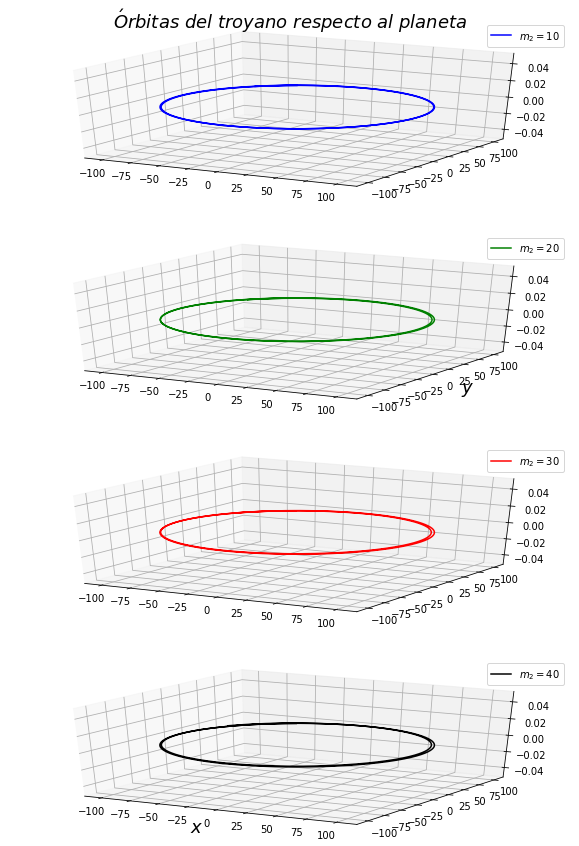

In [57]:
#Se grafican las orbitas del troyano en el sistema de referencia del planeta para los casos anteriores.
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(4, 1, 1, projection='3d')
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(6,8))
ax.plot(x_troyano10-x_planeta10, y_troyano10-y_planeta10, z_troyano10-z_planeta10, label=r"$m_2=10$", c="b")
ax.set_title(r"$\'Orbitas$ $del$ $troyano$ $respecto$ $al$ $planeta$" , fontsize=18)
ax.legend()
ax = fig.add_subplot(4, 1, 2, projection='3d')
ax.plot(x_troyano20-x_planeta20, y_troyano20-y_planeta20, z_troyano20-z_planeta20, label=r"$m_2=20$", c="g")
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
ax = fig.add_subplot(4, 1, 3, projection='3d')
ax.plot(x_troyano30-x_planeta30, y_troyano30-y_planeta30, z_troyano30-z_planeta30, label=r"$m_2=30$", c="r")
ax.legend()
ax = fig.add_subplot(4, 1, 4, projection='3d')
ax.plot(x_troyano40-x_planeta40, y_troyano40-y_planeta40, z_troyano40-z_planeta40, label=r"$m_2=40$", c="k")
ax.set_xlabel(r"$x$", fontsize=18)
ax.legend()
#fig.subplots_adjust(hspace=0.3)
#plt.savefig("MassPLOT.pdf")
#plt.close()
plt.show()